<a href="https://colab.research.google.com/github/prafullaoak/webinars/blob/master/ForGithubLSTM_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###################################################################################
#IMPORTING TA-lib

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4401    0  4401    0     0   6752      0 --:--:-- --:--:-- --:--:--  6750
100  517k  100  517k    0     0   330k      0  0:00:01  0:00:01 --:--:-- 1676k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4421    0  4421    0     0   9907      0 --:--:-- --:--:-- --:--:--  9912
100  392k  100  392k    0     0   312k      0  0:00:01  0:00:01 --:--:--  616k


In [ ]:
# For downloading data
import yfinance as yf

# For manipulating data
import pandas as pd
import numpy as np

# For mathematical operations
import math

import talib

# For visualization
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# For data normalisation
from sklearn.preprocessing import MinMaxScaler

# For building the model
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential

In [ ]:
# # Settings the figsize parameter for the plots in this notebook to standardize the size of plots
%matplotlib inline
rcParams['figure.figsize'] = 20, 10

## Download the data and check it

Download the last 10-years' historical data for (`^NSEI`) using `yfinance`.

In [ ]:
ticker = '^NSEI'
df = yf.download(ticker, period='10y')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Check the dataset
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-05,6262.450195,6300.549805,6232.000000,6241.100098,6241.100098,186100
2013-12-06,6234.399902,6275.350098,6230.750000,6259.899902,6259.899902,158500
2013-12-09,6415.000000,6415.250000,6345.000000,6363.899902,6363.899902,198300
2013-12-10,6354.700195,6362.250000,6307.549805,6332.850098,6332.850098,242400
2013-12-11,6307.200195,6326.600098,6280.250000,6307.899902,6307.899902,148200


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-29,19976.550781,20104.650391,19956.300781,20096.599609,20096.599609,236200
2023-11-30,20108.500000,20158.699219,20015.849609,20133.150391,20133.150391,486600
2023-12-01,20194.099609,20291.550781,20183.699219,20267.900391,20267.900391,265800
2023-12-04,20601.949219,20702.650391,20507.750000,20686.800781,20686.800781,381100
2023-12-05,20808.900391,20864.050781,20711.150391,20855.099609,20855.099609,0


In [ ]:
# Check the number of rows and columns in the dataframe
df.shape

(2454, 6)

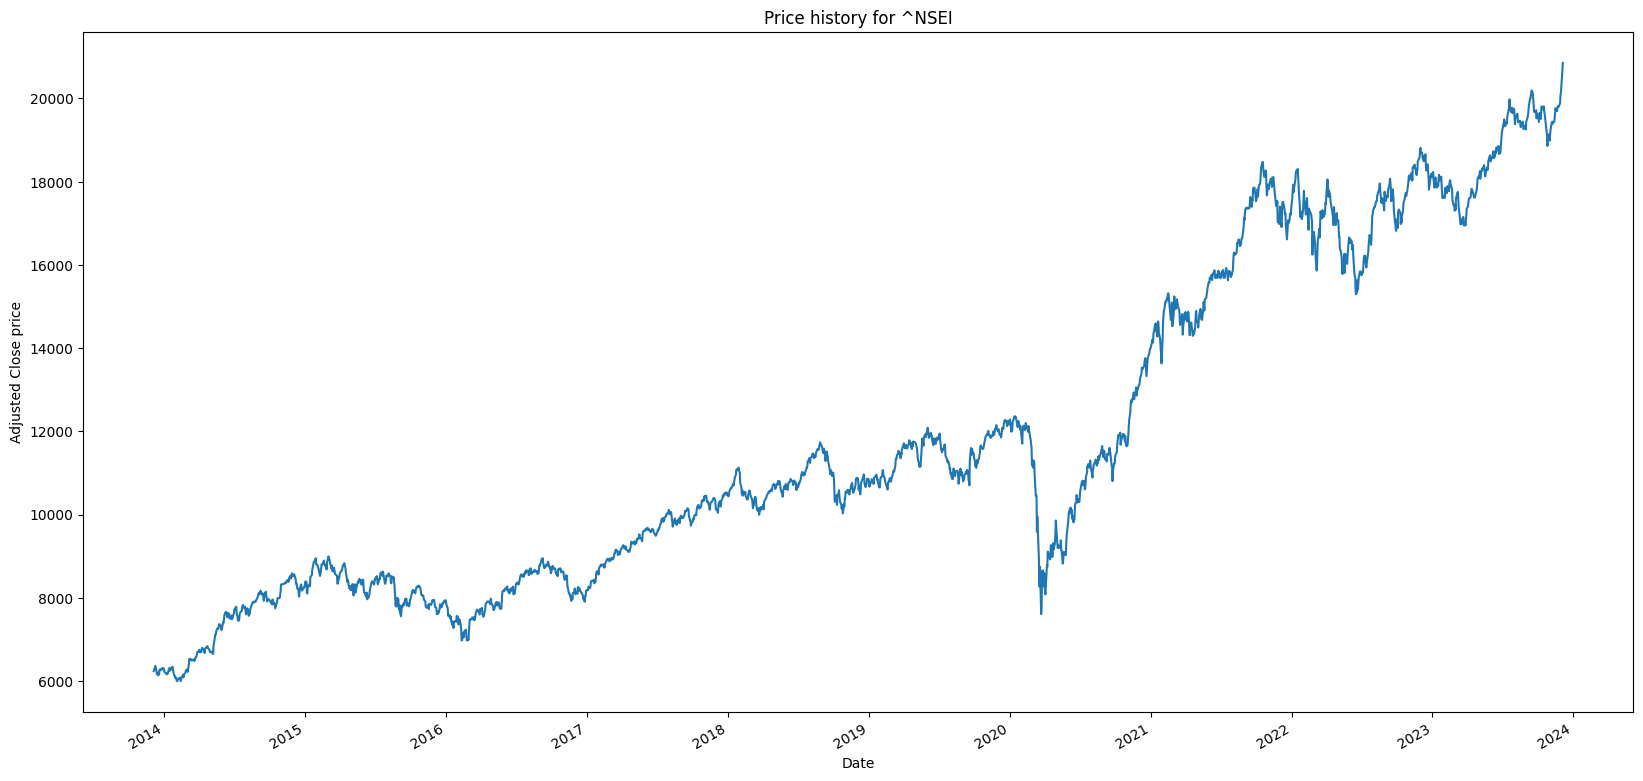

In [ ]:
# Plot the adjusted close price
df['Adj Close'].plot()
plt.ylabel('Adjusted Close price')
plt.title(f'Price history for {ticker}')
plt.show()

In [ ]:

# Calculate Stochastic Oscillator
stoch = talib.STOCH(df['High'], df['Low'], df['Close'])
stoch_k = stoch[0]  # %K line
stoch_d = stoch[1]  # %D line

# Calculate RSI
rsi = talib.RSI(df['Close'])

# Calculate SuperTrend
high = df['High']
low = df['Low']
close = df['Close']
atr = talib.ATR(high, low, close, timeperiod=14)  # Average True Range
super_trend = talib.SMA(close, timeperiod=10) + (atr * 2)  # SuperTrend calculation

# Create a DataFrame to store the indicators
indicators = pd.DataFrame({
    'Stoch_K': stoch_k,
    'Stoch_D': stoch_d,
    'RSI': rsi,
    'SuperTrend': super_trend
}, index=df.index)


df1 = pd.concat([df, indicators], axis=1)

In [ ]:
# Check the filtered dataset
df1.drop(['Open','Adj Close','High'],axis=1,inplace=True)
df1.dropna(inplace=True)
df1.head()

,Low,Close,Volume,Stoch_K,Stoch_D,RSI,SuperTrend
Date,,,,,,,
2013-12-26,6259.450195,6278.899902,182300,77.694446,76.208601,53.044933,6365.612033
2013-12-27,6289.399902,6313.799805,96900,81.165483,80.685836,55.725814,6369.379383
2013-12-30,6273.149902,6291.100098,101300,69.029206,75.963045,53.582913,6381.577999
2013-12-31,6287.299805,6304.000000,103400,60.962926,70.385872,54.650177,6390.598833
2014-01-02,6211.299805,6221.149902,158100,32.257246,54.083126,47.151553,6410.036064


In [ ]:

df1.shape

(2440, 7)

In [ ]:
prices = df1.values
prices

array([[6.25945020e+03, 6.27889990e+03, 1.82300000e+05, ...,
        7.62086007e+01, 5.30449326e+01, 6.36561203e+03],
       [6.28939990e+03, 6.31379980e+03, 9.69000000e+04, ...,
        8.06858365e+01, 5.57258139e+01, 6.36937938e+03],
       [6.27314990e+03, 6.29110010e+03, 1.01300000e+05, ...,
        7.59630449e+01, 5.35829126e+01, 6.38157800e+03],
       ...,
       [2.01836992e+04, 2.02679004e+04, 2.65800000e+05, ...,
        9.01708301e+01, 7.50711899e+01, 2.01933566e+04],
       [2.05077500e+04, 2.06868008e+04, 3.81100000e+05, ...,
        9.47522522e+01, 8.18373472e+01, 2.03300461e+04],
       [2.07111504e+04, 2.08550996e+04, 0.00000000e+00, ...,
        9.63124985e+01, 8.37461135e+01, 2.04476178e+04]])

In [ ]:
# Check the prices array
len(prices)

2440


## Creating the training and test data set

We want 80% of the data for training the model, and 20% for the test data set. So, compute the number of records that are required for the training data set.

In [ ]:
# Computing the number of records we want in the training data set
train_len = math.ceil(len(prices) * 0.8)
train_len
train_data = prices[0:train_len, :]
#print(train_data)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled_prices = scaler.fit_transform(train_data)


In [ ]:
train_data

array([[6.25945020e+03, 6.27889990e+03, 1.82300000e+05, ...,
        7.62086007e+01, 5.30449326e+01, 6.36561203e+03],
       [6.28939990e+03, 6.31379980e+03, 9.69000000e+04, ...,
        8.06858365e+01, 5.57258139e+01, 6.36937938e+03],
       [6.27314990e+03, 6.29110010e+03, 1.01300000e+05, ...,
        7.59630449e+01, 5.35829126e+01, 6.38157800e+03],
       ...,
       [1.73559492e+04, 1.73682500e+04, 2.56600000e+05, ...,
        8.63738131e+01, 4.69007078e+01, 1.78041170e+04],
       [1.72258008e+04, 1.73249004e+04, 2.71000000e+05, ...,
        7.93944563e+01, 4.59115629e+01, 1.78216468e+04],
       [1.71921992e+04, 1.72214004e+04, 2.15000000e+05, ...,
        5.73024560e+01, 4.35499536e+01, 1.78128738e+04]])

In [ ]:
train_len

1952

## Section 5: Define the features and the labels

We should input our data in the form of a 3D array to the LSTM model. First, we create data in 60 timesteps before using numpy to convert it into an array. Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

We

1. Create an empty list for the features `x_train` and labels `y_train`.
2. Create a 60-days window of historical prices as our feature data `x_train`.

In [ ]:

# Create empty lists for feature and label data
x_train, y_train = [], []


# Assuming test_scaled_prices contains multiple features in its columns
num_features = train_scaled_prices.shape[1]  # Get the number of columns/features


# Create a 60-days window of historical prices (i-60) as our feature data (x_train)
# and the following day's price as label data (y_train).
for i in range(60, len(train_data)):
    x_window = []
    for j in range(num_features):  # Assuming there are 2 columns in train_scaled_prices
        x_window.append(train_scaled_prices[i - 60:i, j])
    x_train.append(x_window)
    y_train.append(train_scaled_prices[i, 0])  # Assuming the target column is the first column

x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape)  # Display the shape of the training data before reshaping
# Reshape to (number of samples, sequence length, number of features)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[2], x_train.shape[1])  # Reshape to (number of samples, sequence length, number of features)
print(x_train.shape)

(1892, 7, 60)
(1892, 60, 7)


In [ ]:
test_data = prices[train_len-60:, :]
#scaler = MinMaxScaler(feature_range=(0, 1))
test_scaled_prices = scaler.fit_transform(test_data)
len(test_scaled_prices)

548

In [ ]:
x_test = []
y_test = test_scaled_prices[60:, :]  # Assuming the first column is the target column

print(train_len)


for j in range(num_features):
    sequences = []
    for i in range(60, len(test_scaled_prices)):
        sequences.append(test_scaled_prices[i - 60:i, j])
    x_test.append(sequences)

x_test = np.array(x_test)
print(x_test.shape, y_test.shape)

# Reshape x_test for LSTM input shape
#x_test = np.transpose(x_test, (1, 0, 2))  # Transpose to (number of samples, number of features, sequence length)
x_test = x_test.reshape(x_test.shape[1], x_test.shape[2], x_test.shape[0])  # Reshape to (number of samples, sequence length, number of features)
print(x_test.shape,y_test.shape)

1952
(7, 488, 60) (488, 7)
(488, 60, 7) (488, 7)


In [ ]:
#  Define a Sequential model which consists of a linear stack of layers.
model = Sequential()

# Add a LSTM layer by giving it 100 network units. Set the return_sequence to true so that the output of the layer will be another sequence of the same length
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], num_features)))

# Add another LSTM layer with also 100 network units. But we set the return_sequence to false for this time to only return the last output in the output sequence
model.add(LSTM(100, return_sequences=False))

# Add a densely connected neural network layer with 25 network units
model.add(Dense(25))

# Add a densely connected layer that specifies the output of 1 network unit
model.add(Dense(1))

# Show the summary of our LSTM network architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           43200     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 126151 (492.78 KB)
Trainable params: 126151 (492.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1892/1892 [==============================] - 150s 77ms/step - loss: 0.0022
Epoch 2/3
1892/1892 [==============================] - 137s 73ms/step - loss: 0.0011
Epoch 3/3
1892/1892 [==============================] - 140s 74ms/step - loss: 8.6587e-04


##  Model Evaluation

Now we need to evaluate our trained LSTM model with the test set. Examine the performance of the model using the root mean square error (RMSE) metric.

The steps:
1. Apply the model to predict the stock prices based on the test set using the `predict()` method.
2. Use the `inverse_transform()` method to denormalize the predicted stock prices.
3. Apply the RMSE formula to calculate the degree of discrepancy between the predicted prices and real prices (y_test) and display the result

In [ ]:
# Apply the model to predict the stock prices based on the test set
predictions = model.predict(x_test)

y_test_final =test_scaled_prices[-predictions.shape[0]:,1:]
#open_values = test_scaled_prices[-predictions.shape[0]:, 1:].reshape(-1, 1)
predictions = np.hstack((predictions, y_test_final))
print(predictions)
# Use the inverse_transform method to denormalize the predicted stock prices
predictions = scaler.inverse_transform(predictions)
# Apply the RMSE formula to evaluate the correctness of the predictions
rmse = np.sqrt(np.mean(predictions[:,0] - y_test[:,0])**2)
rmse

len(predictions)

16/16 [==============================] - 1s 31ms/step
[[0.2456162  0.35149966 0.31514716 ... 0.31819703 0.30844752 0.39061923]
 [0.32432064 0.30417494 0.50911701 ... 0.13188183 0.20737997 0.38853235]
 [0.47686604 0.23746751 0.47465901 ... 0.0701593  0.0959276  0.39223191]
 ...
 [0.77909958 0.89441901 0.3816224  ... 0.92345858 0.84648499 0.94171215]
 [0.89559168 0.96973913 0.54716439 ... 0.97329217 0.96500027 0.9730474 ]
 [0.97094518 1.         0.         ... 0.99026347 0.99843402 1.        ]]


488

## Visualizing the Predicted Prices

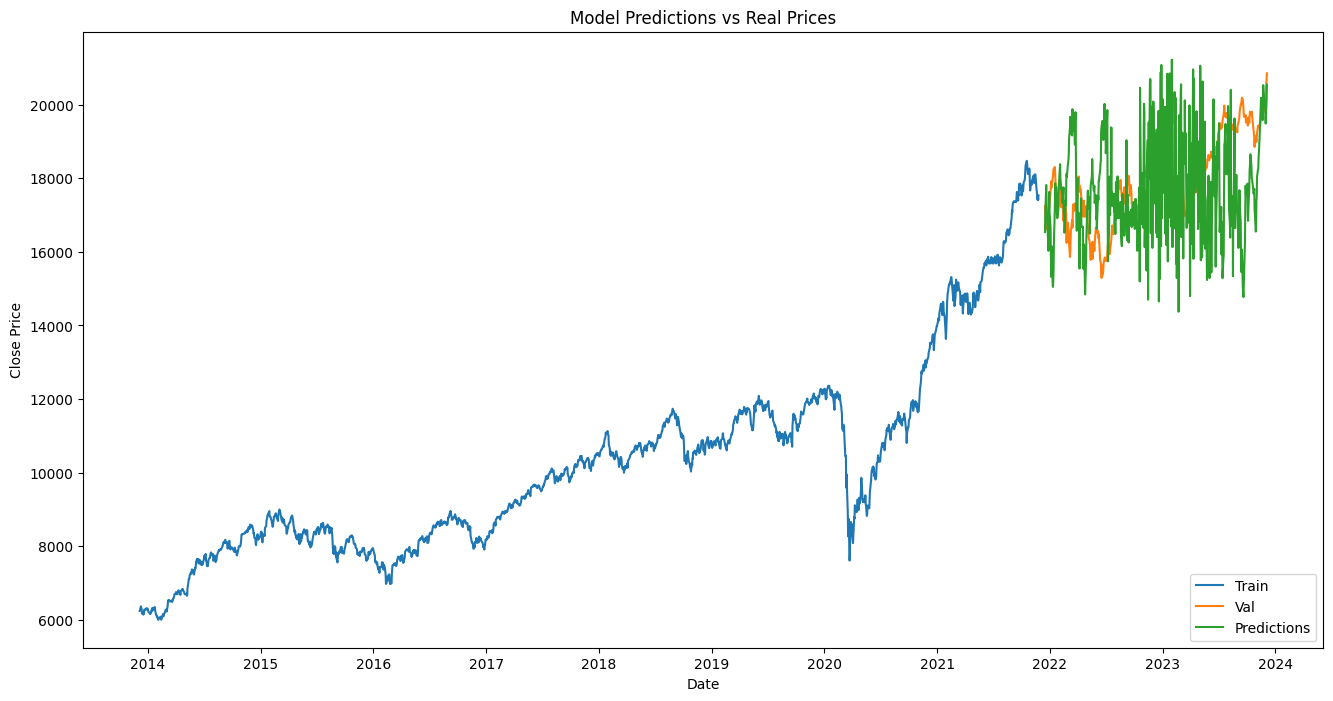

In [ ]:
# Filter the Adj Close prices into a
data = df.filter(['Adj Close'])
train = data[:train_len].copy()
#print(data[train_len:])
#validation = data[train_len:].copy()
validation = data[-predictions.shape[0]:].copy()

#print(predictions[:,0])
validation['Predictions'] = predictions[:,0]
plt.figure(figsize=(16, 8))
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#The model needs much more work before it can be used for predicting.